In [265]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 7102

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [266]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO 创建一个 4*4 单位矩阵
def create_unit_matrix(n):
    matrix = []
    for i in range(n):
        row = []
        for j in range(4):
            col = 0
            if i == j:
                col = 1
            row.append(col)
        matrix.append(row)
    return matrix

I = create_unit_matrix(4)

## 1.2 返回矩阵的行数和列数

In [267]:
# TODO 返回矩阵的行数和列数
def shape(M):
    n, m = 0,0
    if isinstance(M, list):
        n = len(M)
        if isinstance(M[0], list):
            m = len(M[0])
        else:
            raise ValueError("The type of M[0] should be list")
    else:
        raise ValueError("The type of M should be list")
    return n,m


In [268]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [269]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
import math
import decimal

getcontext().prec = 4

def matxRound(M, decPts=4):
    n,m = shape(M)
    
    for i in range(0, n):
        for j in range(0, m):
            x = M[i][j]
            M[i][j] = float(Decimal(str(round(x,decPts))))
    return M


In [270]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.157s

OK


## 1.4 计算矩阵的转置

In [271]:
# TODO 计算矩阵的转置
def transpose(M):
    try:
        n, m = shape(M)
        N = []
        for i in range(0, m):
            l = []
            for j in range(0,n):
                l.append(M[j][i])
            N.append(l)
    except Exception as e:
        raise e
        
    return N


In [272]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.017s

OK


## 1.5 计算矩阵乘法 AB

In [273]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError


def matxMultiply(A, B):
    matxRound(A,4)
    matxRound(B,4)
    m, p = shape(A)
    q, n = shape(B)
    C = []
    try:
        if m == 0 or p == 0 or q == 0 or n == 0:
            raise ValueError("the shape result of A or B should not be 0")            
        elif p == q:
            for i in range(m):
                l = []
                for j in range(n):
                    s = 0
                    for k in range(p):
                        s += A[i][k]*B[k][j]
                    l.append(s)
                C.append(l)
            return C
        else:
            raise ValueError("the row of B should be equal to the col of A")
    except Exception as e:
        raise e
                    
            
    

In [274]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.615s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [275]:
# TODO 构造增广矩阵，假设A，b行数相同
import copy

def augmentMatrix(A, b):
    m, n = shape(A)
    s, t = shape(b)
    B = []
    if m == 0 or n == 0 or s ==0 or t == 0:
        raise ValueError("The row or col of the A and len of b should not be 0")

    if m == s:
        for i in range(m):
            l = copy.deepcopy(A[i])
            l.append(b[i][0])
            B.append(l)
        return B
    else:
        raise ValueError("The row of A should be equal to the len of b")



In [276]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.025s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [277]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值

def swapRows(M, r1, r2):
    m,n = shape(M)    
    if m == 0 or n == 0:
        raise ValueError("The row and col of the M should not be 0")
    temp_row = M[r1]
    M[r1] = M[r2]
    M[r2] = temp_row


In [278]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [279]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值

def scaleRow(M, r, scale):
    #matxRound(M,16)
    m,n = shape(M)
    if m == 0 or n == 0:
        raise ValueError("The row or the col of M should not be 0")
    if r >= m:
        raise ValueErrow("The r should less than the row of M")
    if scale == 0:
        raise ValueError("scale should not be 0")
    for i in range(n):
        M[r][i] = scale*M[r][i]


In [280]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [281]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值

def addScaledRow(M, r1, r2, scale):
    #matxRound(M, decPts=4)
    m,n = shape(M)
    if m == 0 or n == 0:
        raise ValueError("The row or the col of M should not be 0")
    if r1 >= m or r2 >= m:
        raise ValueErrow("r1 or r2 should less than the row of M")
    if scale == 0:
        raise ValueError("scale should not be 0")
    for i in range(n):
        M[r1][i] = M[r2][i]*scale +M[r1][i]


In [282]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

In [283]:
# 不要修改这里！
from helper import *

A = generateMatrix(4,seed,singular=False)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

   0,  -2,  -7,   2 ||  1  
  -2,   1,  -7,  -1 ||  1  
  -3,   3,   1,   1 ||  1  
  -1,   2,  -2,   6 ||  1  


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。
在下面列出每一次循环体执行之后的增广矩阵。


1. 当前列为第0列： 
   1) 寻找列0中 对角线以及对角线以下所有元素（行 0~3）的绝对值的最大值 
   2) 第2行的第0列绝对值最大, swapRows(Ab, 0, 2)
   3) 将第0列第0行的元素缩放为1，scaleRow(Ab, 0, $-\frac{1}{3}$)   
   4) 将第0行以下其它行的第0列元素消为0：
       . 将第0列第1行的元素消为0，addScaledRow(Ab, 1, 0, 2)
       . 将第0列第3行的元素消为0，addScaledRow(Ab, 3, 0, 1)
       
   以上操作结束后 $ Ab = \begin{bmatrix}
                        1.000 & -1.000 & -0.333 & -0.333 & -0.333\\
                        0 & -1.000 & -7.667 & -1.667 & 0.333\\
                        0 & -2.000 & -7.000 & 2.000 & 1.000\\
                        0 & 1.000 & -2.333 & 5.667 & 0.667\end{bmatrix} $
   
2. 当前列为第1列：
   1）寻找列1中 对角线以及对角线以下所有元素（行 1~3）的绝对值的最大值
   2）第2行的第1列绝对值最大, swapRows(Ab, 1, 2)
   3）将第1列第1行的元素缩放为1，scaleRow(Ab, 1, $-\frac{1}{2}$)
   4）将第1行以下其它行的第1列元素消为0：
       . 将第1列第2行的元素消为0，addScaledRow(Ab, 0, 1, 1)
       . 将第1列第2行的元素消为0，addScaledRow(Ab, 2, 1, 1)
       . 将第1列第3行的元素消为0，addScaledRow(Ab, 3, 1, -1)
   以上操作结束后，$ Ab = \begin{bmatrix}
                        1.000 & 0 & 3.1667 & -1.333 & -0.8333\\
                        0 & 1.000 & 3.500 & -1.000 & -0.500\\
                        0 & 0 & -4.167 & -2.667 & -0.167\\
                        0 & 0 & -5.833 & 6.667 & 1.167\end{bmatrix} $

3. 当前列为第2列：
   1）寻找列2中 对角线以及对角线以下所有元素（行 2~3）的绝对值的最大值
   2）第3行的第2列绝对值最大, swapRows(Ab, 2, 3)
   3）将第2列第2行的元素缩放为1，scaleRow(Ab, 2, $-\frac{1}{5.833}$)
   4）将第2行以下其它行的第2列元素消为0：
       . 将第2列第0行的元素消为0，addScaledRow(Ab, 0, 2, -3.1667)
       . 将第2列第1行的元素消为0，addScaledRow(Ab, 1, 2, -3.500)
       . 将第2列第3行的元素消为0，addScaledRow(Ab, 3, 2, 4.167)
       
   以上操作结束后，$ Ab = \begin{bmatrix}
                        1.000 & 0 & 0 & 2.2857 & -0.2000\\
                        0 & 1.000 & 0 & 3.0 & 0.2000\\
                        0 & 0 & 1.000 & -1.143 & -0.200\\
                        0 & 0 & 0 & -7.429 & -1.000\end{bmatrix} $

4. 当前列为第3列：
   1）寻找列3中 对角线以及对角线以下所有元素（行 3~3）的绝对值的最大值
   2）第3行的第3列绝对值最大, 不用变换
   3）将第3列第3行的元素缩放为1，scaleRow(Ab, 3, $-\frac{1}{7.429}$)
   4）将第3行以下其它行的第2列元素消为0：
       . 将第3列第0行的元素消为0，addScaledRow(Ab, 0, 3, -2.2857)
       . 将第3列第1行的元素消为0，addScaledRow(Ab, 1, 3, -3.0)
       . 将第3列第2行的元素消为0，addScaledRow(Ab, 2, 3, 1.143)
   以上操作结束后，$ Ab = \begin{bmatrix}
                        1.000 & -1.000 & 0 & 0 & -0.5077\\
                        0 & 1.000 & 0 & 0 & -0.2038\\
                        0 & 0 & 1.000 & 0 & -0.046\\
                        0 & 0 & 0 & 1.000 & 0.1346\end{bmatrix} $







要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$

$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$
    
$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$
    
$...$

In [284]:
# 不要修改这里！
A = generateMatrix(4,seed,singular=True)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

   6,  -2,   0,  -2 ||  1  
  -4, -10,   9,   0 ||  1  
   7,  -2,   1,  -3 ||  1  
  -5,  -1,  -8,   7 ||  1  


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

1. 当前列为第0列： 
   1) 寻找列0中 对角线以及对角线以下所有元素（行 0~3）的绝对值的最大值 
   2) 第2行的第0列绝对值最大, swapRows(Ab, 0, 2)
   3) 将第0列第0行的元素缩放为1，scaleRow(Ab, 0, $\frac{1}{7}$)   
   4) 将第0行以下其它行的第0列元素消为0：
       . 将第0列第1行的元素消为0，addScaledRow(Ab, 1, 0, 4)
       . 将第0列第2行的元素消为0，addScaledRow(Ab, 2, 0, -6)
       . 将第0列第2行的元素消为0，addScaledRow(Ab, 3, 0, -5)
   以上操作结束后 $ Ab = \begin{bmatrix}
                        1.000 & -0.286 & -0.143 & -0.429 & 0.143\\
                        0 & -11.143 & 9.571 & -1.714 & 1.571\\
                        0 & -0.286 & -0.857 & 0.571 & 0.142\\
                        0 & -2.429 & -7.286 & 4.857 & 1.714\end{bmatrix} $
   
2. 当前列为第1列：
   1）寻找列1中 对角线以及对角线以下所有元素（行 1~3）的绝对值的最大值
   2）第2行的第2列绝对值最大, 不用交换
   3）将第1列第1行的元素缩放为1，scaleRow(Ab, 1, $-\frac{1}{11.143}$)
   4）将第1行以下其它行的第1列元素消为0：
       . 将第1列第0行的元素消为0，addScaledRow(Ab, 0, 1, 0.2859)
       . 将第1列第2行的元素消为0，addScaledRow(Ab, 2, 1, 0.2859)
       . 将第1列第3行的元素消为0，addScaledRow(Ab, 3, 1, 2.4289)
   以上操作结束后，$ Ab = \begin{bmatrix}
                        1.000 & 0 & -0.1026 & -0.3846 & 0.1026\\
                        0 & 1.000 & -0.859 & 0.154 & -0.141\\
                        0 & 0 & -1.103 & 0.615 & 0.103\\
                        0 & 0 & -9.372 & 5.231 & 1.372\end{bmatrix} $                      
                        
3. 当前列为第2列：
   1）寻找列2中 对角线以及对角线以下所有元素（行 2~3）的绝对值的最大值
   2）第3行的第2列绝对值最大, swapRows(Ab, 2, 3)
   3）将第2列第2行的元素缩放为1，scaleRow(Ab, 2, $-\frac{1}{9.372}$)
   4）将第2行以下其它行的第2列元素消为0：
       . 将第2列第0行的元素消为0，addScaledRow(Ab, 0, 2, 0.1026)
       . 将第2列第1行的元素消为0，addScaledRow(Ab, 1, 2, 0.859)
       . 将第2列第3行的元素消为0，addScaledRow(Ab, 3, 2, 1.1029)

   以上操作结束后，$ Ab = \begin{bmatrix}
                        1.000 & 0 & 0 & -0.4419 & 0.087\\
                        0 & 1.000 & 0 & -0.3256 & -0.2668\\
                        0 & 0 & 1.000 & -0.558 & -0.146\\
                        0 & 0 & 0 & 0 & -0.059\end{bmatrix} $
                        
                      

4. 当前列为第3列：
   1）寻找列3中 对角线以及对角线以下所有元素（行 3~3）的绝对值的最大值
   2）第3行的第3列绝对为0

   
   以上操作结束后，$ Ab = \begin{bmatrix}
                       1.000 & 0 & 0 & -0.4419 & 0.087\\
                        0 & 1.000 & 0 & -0.3256 & -0.2668\\
                        0 & 0 & 1.000 & -0.558 & -0.146\\
                        0 & 0 & 0 & 0 & -0.059\end{bmatrix} $



要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$

$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$
    
$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$
    
$...$

### 2.3.3 实现 Gaussian Jordan 消元法

In [285]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""


def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    if shape(A)[0] != shape(b)[0]:
        return None
    B = augmentMatrix(A,b)
    row, col = shape(B)

    for i in range(col-1):
        #找到i列对角线上绝对值最大的行，如果不是第i行，则与第i行互换
        max_abs_coefficient_row = i
        for j in range(i+1, row):
            if abs(B[j][i]) > abs(B[max_abs_coefficient_row][i]):
                max_abs_coefficient_row = j
        if abs(B[max_abs_coefficient_row][i]) < epsilon:
               return None
        if max_abs_coefficient_row != i:
            swapRows(B, i, max_abs_coefficient_row)
        
        #将第i列第i行的元素缩放为1，scaleRow(Ab, 2, $-\frac{1}{9.372}$)
        if abs(B[i][i] - 1) > epsilon:
            scaleRow(B, i, 1.0/B[i][i])
        
        #将第i行以外其它行的第1列元素消为0：
        for k in range(0, row):
            if abs(B[k][i]) > epsilon and k != i:
                addScaledRow(B, k, i, (-1.0)*B[k][i])

    x = []   
    for i in range(row):
        l =[]       
        l.append(B[i][col-1])
        x.append(l)

    return x




In [286]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 5.564s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3  线性回归

## 3.1 随机生成样本点

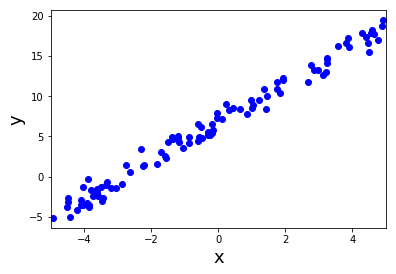

In [287]:
# 不要修改这里！
# 运行一次就够了！s
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

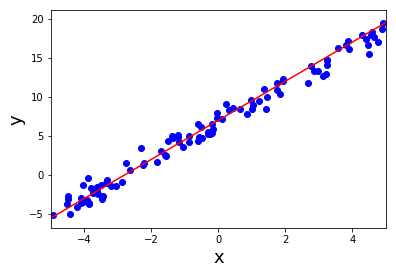

In [294]:
#TODO 请选择最适合的直线 y = mx + b
m = 2.5
b = 7

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [m*x+b for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [295]:
# TODO 实现以下函数并输出所选直线的MSE
m = 2.5
b = 7
def calculateMSE(X,Y,m,b):
    n = len(X)
    MSE = 0
    l = [(y -m*x -b)**2 for x, y in zip(X, Y)]
    for i in range(n):
        MSE += l[i]
    MSE = MSE*1.0/n

    return MSE

print(calculateMSE(X,Y,m,b))

0.941350715568


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m,b$ 让蓝点均匀覆盖在红线周围，然后微调 $m, b$ 让MSE最小。

In [296]:
m= 2.3
b= 6.7
print(calculateMSE(X,Y,m,b))

0.823675942434


## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

$$  \frac{\partial E}{\partial m} = \lim_{\Delta m \to 0} {\frac{1}{2} \sum_{i=1}^{n}{\frac{(y_i-x_i(m+\Delta m) -b)^2 -(y_i-xim -b)^2}{\Delta m} }} = \lim_{\Delta m \to 0} {\frac{1}{2} \sum_{i=1}^{n}{\frac{(2y_i-2x_im -2b -x_i \Delta m)(-x_i\Delta m)}{\Delta m} }} =  \lim_{\Delta m \to 0} {\frac{1}{2} \sum_{i=1}^{n}{(2y_i-2x_im -2b -x_i \Delta m)(-x_i)} } = \lim_{\Delta m \to 0} { \sum_{i=1}^{n}{(y_i-x_im -b -\frac{1}{2}x_i \Delta m)(-x_i)} } = \sum_{i=1}^{n}{(y_i-x_im -b)(-x_i)} = \sum_{i=1}^{n} {-x_i(y_i-x_im -b)}  $$ 


$$ \frac{\partial E}{\partial b} = \lim_{\Delta b \to 0}{\frac{1}{2} \sum_{i=1}^{n}{\frac{(y_i-mx_i -(b+\Delta b))^2 -(y_i-mx_i -b)^2}{\Delta b}}} = \lim_{\Delta b \to 0}{\frac{1}{2} \sum_{i=1}^{n}{\frac{(2y_i-2mx_i -2b - \Delta b)(-\Delta b)}{\Delta b}}} = \lim_{\Delta b \to 0}{ \sum_{i=1}^{n}{-(y_i-mx_i -b -\frac{1}{2}\Delta b)}} = \sum_{i=1}^{n}{-(y_i-mx_i -b) } 
$$

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数

目标函数：
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2} = \frac{1}{2}((1-m-b)^2 + (2-2m -b)^2 +(2-3m -b)^2)
$$

二元二次方程组：
$$ \begin{cases}
    (-1)(1-m-b) + (-2)(2-2m-b)+(-3)(2-3m -b) =0 \\
    -(1-m-b)-(2-2m-b)-(2-3m-b) = 0
   \end{cases} \Rightarrow 
   \begin{cases}
    5-6m-3b = 0 \\
    11-14m -6b = 0
   \end{cases} \Rightarrow  $$
最优解：
$$ \begin{cases}
    m = \frac{1}{2} \\
    b = \frac{2}{3}
   \end{cases} $$


### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

$$ X^T = \begin{bmatrix}
    x_1 & x_2 & ... & x_n \\
    1 & 1 & ... & 1\end{bmatrix} $$
$$ Y = \begin{bmatrix} y_1 \ y_2 \ ... \ y_n \end{bmatrix} $$

$$X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}$$ 

$$ X^TX = \begin{bmatrix} 
           \sum_{i=1}^{n}{x_i^2} & \sum_{i=1}^{n}{x_i} \\
           \sum_{i=1}^{n}{x_i} & n
          \end{bmatrix}, $$

$$ X^TXh = \begin{bmatrix}
           m\sum_{i=1}^{n}{x_i^2} + b\sum_{i=1}^{n}{x_i} \\
           m\sum_{i=1}^{n}{x_i} + nb
        \end{bmatrix} $$

$$ X^TY = \begin{bmatrix}
          \sum_{i=1}^{n}{x_iy_i} \\
          \sum_{i=1}^{n}{y_i}
          \end{bmatrix}$$

$$ X^TXh - X^TY = \begin{bmatrix}
                    m\sum_{i=1}^{n}{x_i^2} + b\sum_{i=1}^{n}{x_i} - \sum_{i=1}^{n}{x_iy_i} \\
                    m\sum_{i=1}^{n}{x_i} + nb - \sum_{i=1}^{n}{y_i}
                  \end{bmatrix}
                = \begin{bmatrix}
                   \sum_{i=1}^{n}{mx_i^2 +bx_i - x_iy_i} \\
                   \sum_{i=1}^{n}{mx_i + b - y_i}
                  \end{bmatrix} 
                = \begin{bmatrix}
                   \sum_{i=1}^{n}{x_i(mx_i + b -y_i)} \\
                   \sum_{i=1}^{n}{mx_i + b - y_i}
                  \end{bmatrix} $$
$$ y_i = mx_i + b \Rightarrow mx_i + b - y_i = 0 \Rightarrow X^TXh - X^TY = \begin{bmatrix} 0 \\ 0 \end{bmatrix} = 0 $$
                




至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [291]:
# TODO 实现线性回归
'''
参数：X, Y
返回：m，b
'''
def linearRegression(X,Y):       
    n = len(X)
    Yn = []
    for i in range(n):
        l =[]
        l.append(Y[i])
        Yn.append(l)
    Xn = []
    for i in range(n):
        m = []
        m.append(X[i])
        m.append(1)
        Xn.append(m)
        
    Xn_ = transpose(Xn)
    A = matxMultiply(Xn_, Xn)
    B = matxMultiply(Xn_, Yn)
    
    h = gj_Solve(A, B, decPts=4, epsilon = 1.0e-16)
    m = h[0][0]
    b = h[1][0]
    return m,b


m,b = linearRegression(X,Y)
print m,b

2.37596251762 6.7650565433


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

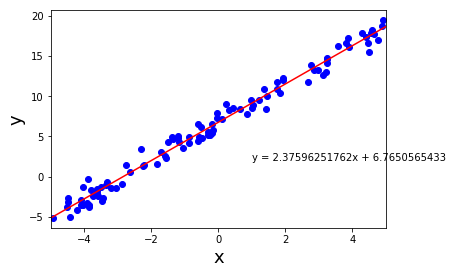

In [292]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m+b, x2*m+b

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.text(1,2,'y = {m}x + {b}'.format(m=m,b=b))
plt.show()

你求得的回归结果对当前数据集的MSE是多少？

In [293]:
calculateMSE(X,Y,m,b)

0.7732860240235925